In [12]:
import pandas as pd
import spacy
from collections import Counter
from tqdm import tqdm
nlp = spacy.load('en_core_web_sm')

In [3]:
gpt4 = pd.read_csv('gpt4_full_merged.csv')
gpt4 = gpt4[(gpt4['gpt4_simple'].str.len() >246) & (gpt4['gpt4_simple'].str.len() < 322)]

gpt3 = pd.read_csv('gpt3_full_merged.csv')
gpt3 = gpt3[(gpt3['gpt3_simple'].str.len() > 178) & (gpt3['gpt3_simple'].str.len() < 342)]

llama = pd.read_csv('llama/sample.csv')
llama = llama[(llama['llama_simple'].str.len() >33) & (llama['llama_simple'].str.len() < 535)]
llama = llama[llama['llama_simple'].notna()]

mistral = pd.read_csv('mistral_merged.csv')
mistral = mistral[(mistral['mistral_simple'].str.len() > 136) & (mistral['mistral_simple'].str.len() < 532)]
mistral = mistral[mistral['mistral_simple'].notna()]

In [13]:
# Function to extract named entities
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

## Original tweets

In [11]:
# Apply the function to the dataframe to extract entities
gpt4['entities'] = gpt4['text'].apply(extract_entities)

# Extract the text of entities for frequency counting
all_entities = []
for tweet_entities in gpt4['entities']:
    all_entities.extend([entity[0] for entity in tweet_entities])  # Extract only entity text

# Count the frequency of each entity
entity_counts = Counter(all_entities)

# Sort entities by frequency
sorted_entities = sorted(entity_counts.items(), key=lambda x: x[1], reverse=True)

# Print the most frequent entities
for entity, count in sorted_entities[:30]:
    print(f"{entity}: {count}")


Trump: 575
Americans: 418
Senate: 401
American: 401
\nhttps://t.co: 400
#: 318
Congress: 286
America: 276
Biden: 276
U.S.: 238
Democrats: 213
first: 207
today: 205
Republicans: 191
China: 185
one: 144
GOP: 138
COVID-19: 133
US: 132
millions: 114
Republican: 105
House: 91
Washington: 87
Texas: 86
Russia: 84
Today: 83
Iran: 71
Hawley: 70
@POTUS: 67
Michigan: 65


In [4]:
# Function to extract named entities
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Extract entities from each tweet
def extract_entities(entities_list):
    entities = [entity[0] for entity in entities_list]  # Extracting only the entity text
    return entities

### GPT-4

In [17]:
# Apply the function to the DataFrame with a progress bar
gpt4['gpt4_entities'] = gpt4['gpt4_simple'].progress_apply(extract_entities)  # Use progress_apply()

# Extract the text of entities for frequency counting
all_entities = []
for tweet_entities in tqdm(gpt4['gpt4_entities'], desc='Extracting entities'):
    all_entities.extend([entity[0] for entity in tweet_entities])  # Extract only entity text

# Count the frequency of each entity
entity_counts = Counter(all_entities)

# Sort entities by frequency
sorted_entities = sorted(entity_counts.items(), key=lambda x: x[1], reverse=True)

# Print the most frequent entities
for entity, count in sorted_entities[:30]:
    print(f"{entity}: {count}")

Extracting entities: 100%|█████████████| 9337/9337 [00:00<00:00, 2323615.55it/s]

#: 1850
Americans: 1132
Trump: 1106
American: 1035
GOP: 741
America: 700
Biden: 623
Democrats: 444
COVID-19: 364
Congress: 316
U.S.: 315
Senate: 309
millions: 258
China: 247
first: 247
Republicans: 178
ACA: 176
’s: 171
Obama: 151
AmericaFirst: 132
Russia: 131
Iran: 127
Ukraine: 116
US: 109
Dems: 106
Proud: 99
Texas: 99
House: 97
today: 90
Constitution: 89


### GPT-3.5

In [20]:
# Apply the function to the DataFrame with a progress bar
gpt3['gpt3_entities'] = gpt3['gpt3_simple'].progress_apply(extract_entities)  # Use progress_apply()

# Extract the text of entities for frequency counting
all_entities = []
for tweet_entities in tqdm(gpt3['gpt3_entities'], desc='Extracting entities'):
    all_entities.extend([entity[0] for entity in tweet_entities])  # Extract only entity text

# Count the frequency of each entity
entity_counts = Counter(all_entities)

# Sort entities by frequency
sorted_entities = sorted(entity_counts.items(), key=lambda x: x[1], reverse=True)

# Print the most frequent entities
for entity, count in sorted_entities[:30]:
    print(f"{entity}: {count}")

Extracting entities: 100%|█████████████| 9725/9725 [00:00<00:00, 2978430.55it/s]

#: 2809
Trump: 1139
Americans: 989
American: 983
Democrat: 881
Democrats: 851
GOP: 626
Biden: 603
Senate: 380
Congress: 365
Republican: 349
America: 307
Republicans: 302
China: 268
COVID-19: 256
US: 250
U.S.: 247
first: 214
millions: 183
Russia: 166
#GOP: 135
Obama: 129
Iran: 123
Ukraine: 117
the Democrat party: 115
Texas: 113
#COVID19: 112
AmericaFirst: 104
ACA: 100
House: 96


### Llama

In [23]:
# Apply the function to the DataFrame with a progress bar
llama['llama_entities'] = llama['llama_simple'].progress_apply(extract_entities)  # Use progress_apply()

# Extract the text of entities for frequency counting
all_entities = []
for tweet_entities in tqdm(llama['llama_entities'], desc='Extracting entities'):
    all_entities.extend([entity[0] for entity in tweet_entities])  # Extract only entity text

# Count the frequency of each entity
entity_counts = Counter(all_entities)

# Sort entities by frequency
sorted_entities = sorted(entity_counts.items(), key=lambda x: x[1], reverse=True)

# Print the most frequent entities
for entity, count in sorted_entities[:30]:
    print(f"{entity}: {count}")

Extracting entities: 100%|█████████████| 8061/8061 [00:00<00:00, 2731702.72it/s]

#: 1184
American: 621
Americans: 575
Trump: 551
America: 367
Democrat: 311
US: 304
Senate: 269
MAGA: 220
GOP: 217
China: 207
Democrats: 196
Congress: 192
first: 165
@POTUS: 154
@realDonaldTrump: 144
Republicans: 140
Biden: 133
COVID-19: 126
Russia: 120
Republican: 118
millions: 112
Today: 99
one: 90
U.S.: 85
Proud: 81
Obama: 80
Ukraine: 78
Iran: 78
today: 76


### Mistral

In [24]:
# Apply the function to the DataFrame with a progress bar
mistral['mistral_entities'] = mistral['mistral_simple'].progress_apply(extract_entities)  # Use progress_apply()

# Extract the text of entities for frequency counting
all_entities = []
for tweet_entities in tqdm(mistral['mistral_entities'], desc='Extracting entities'):
    all_entities.extend([entity[0] for entity in tweet_entities])  # Extract only entity text

# Count the frequency of each entity
entity_counts = Counter(all_entities)

# Sort entities by frequency
sorted_entities = sorted(entity_counts.items(), key=lambda x: x[1], reverse=True)

# Print the most frequent entities
for entity, count in sorted_entities[:30]:
    print(f"{entity}: {count}")

Extracting entities: 100%|█████████████| 9431/9431 [00:00<00:00, 2113172.77it/s]

#: 2940
American: 753
Americans: 687
Trump: 629
Senate: 495
Democrats: 491
US: 477
Congress: 413
Republican: 394
Democrat: 388
Biden: 344
GOP: 328
U.S.: 327
Republicans: 312
Trumps: 253
first: 251
China: 231
COVID-19: 221
millions: 206
America: 194
Democratic: 187
House: 165
Russia: 161
Twitter: 158
Bidens: 144
Russian: 125
one: 119
Iran: 118
Ukraine: 114
ACA: 111


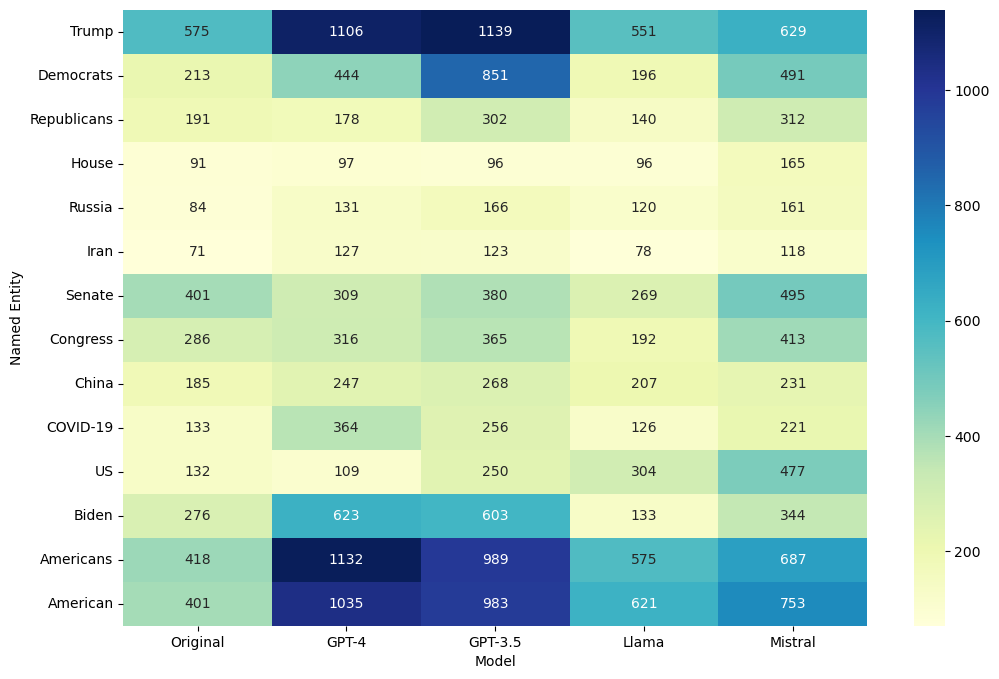

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Named entities data for each model
data = {
    'Original': {
        'Trump': 575, 'Americans': 418, 'Senate': 401, 'American': 401, 'Congress': 286, 'Biden': 276, 
        'Democrats': 213, 'Republicans': 191, 'China': 185, 'COVID-19': 133, 'US': 132, 'House': 91, 
        'Russia': 84, 'Iran': 71
    },
    'GPT-4': {
        'Trump': 1106, 'Americans': 1132, 'Senate': 309, 'American': 1035, 'Congress': 316, 'Biden': 623, 
        'Democrats': 444, 'Republicans': 178, 'China': 247, 'COVID-19': 364, 'US': 109, 'House': 97, 
        'Russia': 131, 'Iran': 127
    },
    'GPT-3.5': {
        'Trump': 1139, 'Americans': 989, 'Senate': 380, 'American': 983, 'Congress': 365, 'Biden': 603, 
        'Democrats': 851, 'Republicans': 302, 'China': 268, 'COVID-19': 256, 'US': 250, 'House': 96, 
        'Russia': 166, 'Iran': 123
    },
    'Llama': {
        'Trump': 551, 'Americans': 575, 'Senate': 269, 'American': 621, 'Congress': 192, 'Biden': 133, 
        'Democrats': 196, 'Republicans': 140, 'China': 207, 'COVID-19': 126, 'US': 304, 'House': 96, 
        'Russia': 120, 'Iran': 78
    },
    'Mistral': {
        'Trump': 629, 'Americans': 687, 'Senate': 495, 'American': 753, 'Congress': 413, 'Biden': 344, 
        'Democrats': 491, 'Republicans': 312, 'China': 231, 'COVID-19': 221, 'US': 477, 'House': 165, 
        'Russia': 161, 'Iran': 118
    }
}

# Find the common entities across all models
common_entities = set(data['Original'].keys())
for model_data in data.values():
    common_entities.intersection_update(model_data.keys())

# Create a dictionary of common entities for the DataFrame
df_data = {model: {entity: data[model][entity] for entity in common_entities} for model in data.keys()}

# Create DataFrame
df = pd.DataFrame(df_data)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, fmt='d', cmap='YlGnBu')  # annot=True to display values, fmt='d' to format as integers
#plt.title('Named Entity Recognition Heatmap')
plt.xlabel('Model')
plt.ylabel('Named Entity')
plt.show()
